In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

concentration_col = 'PriA-SSB Dose response: Concentration (uM)'
ic50_col = 'PriA-SSB Dose response: IC50 (uM)'
median_inhib_col = 'Median % negative control (%)'
inhib_col = 'PriA-SSB Dose response: % negative control (%)'

res_full_df = pd.read_csv('../datasets/enamine_results/EnamineREAL_raw_dose_response_CDDcsvExport-2021-03-31-125137_cln.csv')

res_df_list = []
for concentration_val in [66, 33, 16.5, 8.25, 4.125, 2.0625, 1.03125, 0.515625]:
    res_df = res_full_df[res_full_df[concentration_col] == concentration_val]
    res_df = res_df[['Molecule Name', 'SMILES', 'Synonyms', concentration_col, inhib_col, ic50_col]]
    res_df.index = res_df['Molecule Name'].tolist()
    res_df[median_inhib_col] = 0
    for smssf_id, row in res_df.groupby('Molecule Name').median().iterrows():
        res_df.loc[smssf_id, median_inhib_col] = row[inhib_col]
        res_df.loc[smssf_id, median_inhib_col] = row[inhib_col]
    res_df = res_df.reset_index(drop=True)

    assert res_df['Molecule Name'].unique().shape[0] == 68
    assert res_df['Synonyms'].unique().shape[0] == 68

    res_df['% Inhibition'] = 100.0 - res_df[median_inhib_col]

    res_df_list.append(res_df)
    
res_df = pd.concat(res_df_list)

res_df = res_df.rename({'Molecule Name' : 'SMSSF Molecule ID', 'Synonyms': 'ID Enamine', 'SMILES': 'SMSSF SMILES'}, axis=1)
w_df = pd.read_csv('../datasets/enamine_results/Enamine_IC50_wildman_potency_2021-03-12.csv')
w_df = w_df[['Molecule Name', 'Wildman Hit', 'Wildman Potency']]
w_df = w_df.rename({'Molecule Name' : 'SMSSF Molecule ID'}, axis=1)

res_df = res_df.merge(w_df, on='SMSSF Molecule ID')

res_df.to_csv('../datasets/enamine_results/pria_enamine_inhib_all_uM.csv', index=False)

In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

concentration_col = 'PriA-SSB Dose response: Concentration (uM)'
inhib_col = 'PriA-SSB Dose response: % negative control (%)'
ic50_col = 'PriA-SSB Dose response: IC50 (uM)'

cpd_info_df = pd.read_csv('../datasets/Zenodo/v1/enamine_final_list_v2.csv.gz').drop('Hit', axis=1)
res_df = pd.read_csv('../datasets/enamine_results/pria_enamine_inhib_all_uM.csv')

res_df = res_df.merge(cpd_info_df, on='ID Enamine')

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

res_df['Target'] = 'PriA-SSB'
concentration_col = 'PriA-SSB Dose response: Concentration (uM)'

res_df_list = []
for i, concentration_val in enumerate([66, 33, 16.5, 8.25, 4.125, 2.0625, 1.03125, 0.515625]):
    temp_df = res_df[res_df[concentration_col] == concentration_val]
    
    for mol_id in temp_df['SMSSF Molecule ID'].unique():
        temp2_df = temp_df[temp_df['SMSSF Molecule ID'] == mol_id]
        temp2_df['replicate'] = range(1, 5)
        
        res_df_list.append(temp2_df)
    
res_df = pd.concat(res_df_list)

res_df = res_df.rename({'SMSSF Molecule ID': 'serum'}, axis=1)

In [65]:
fits = neutcurve.CurveFits(res_df, conc_col=concentration_col, fracinf_col=inhib_col, 
                           serum_col='serum', virus_col='Target', replicate_col='replicate', 
                           infectivity_or_neutralized='infectivity', fixbottom=0, fixtop=180.0)

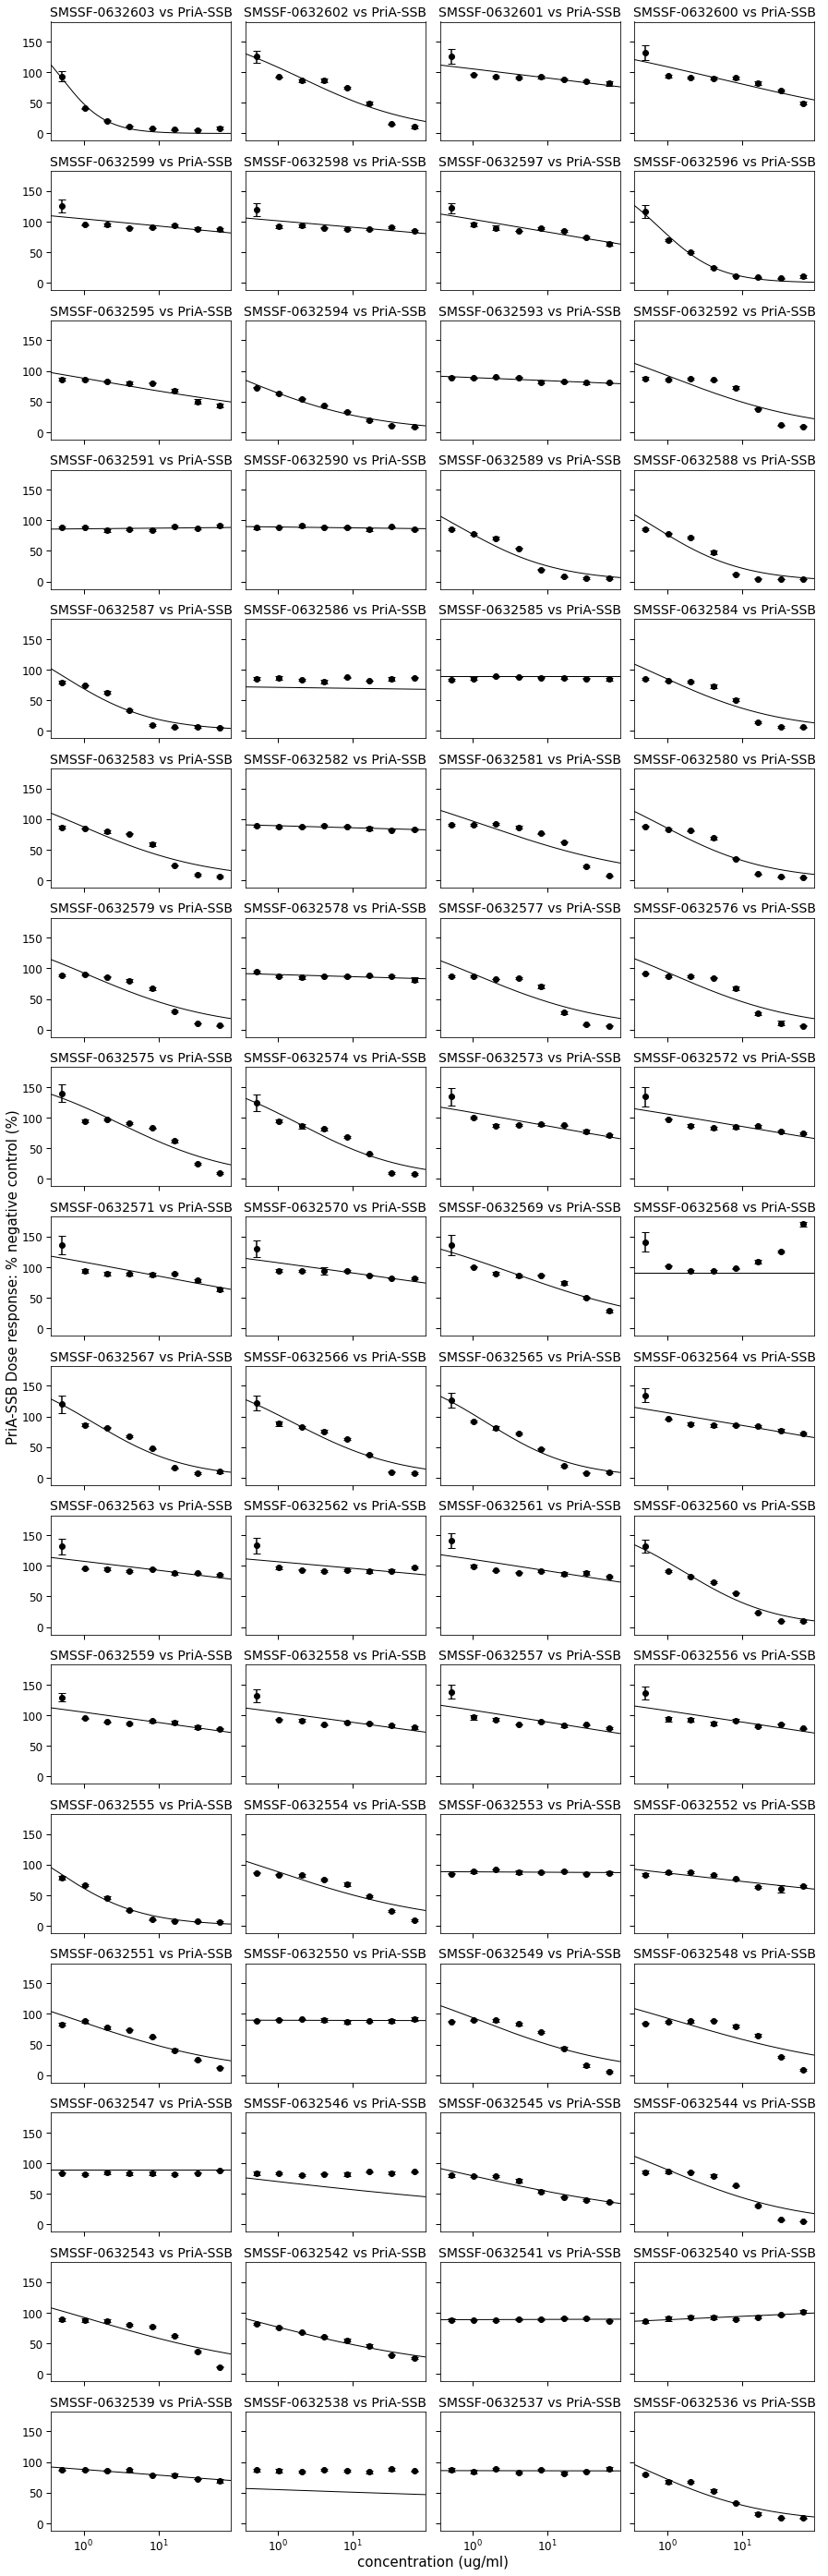

In [66]:
fig, axes = fits.plotAverages(xlabel='concentration (ug/ml)')

In [1]:
import pandas as pd

df1 = pd.read_csv('../datasets/enamine_results/enamine_corrected_check.csv')
df2 = pd.read_csv('../datasets/enamine_results/spencer_mapping.csv')

In [12]:
for i, row in df1.iterrows():
    correct_mol = row["Molecule Name"]
    bad_mol = row["old SMSSF Molecule ID"]
    
    x = df2[df2["Molecule_Name"] == correct_mol]
    
    assert x.shape[0] == 1
    
    spencer_correct_mol = x["Molecule_Name"].iloc[0]
    spencer_bad_mol = x["Bad_Molecule_Name"].iloc[0]
    
    assert (correct_mol == spencer_correct_mol) and (bad_mol == spencer_bad_mol)

In [15]:
bad_mol, spencer_bad_mol

('SMSSF-0632571', 'SMSSF-0632571')

In [16]:
df1 = pd.read_csv('../datasets/enamine_results/10_cpds_retested_dose-response_2021-07-01.csv')

df1.columns

Index(['Molecule Name', 'SMILES', 'Synonyms',
       'PriA-SSB Dose response: Run Date',
       'PriA-SSB Dose response: Run Conditions',
       'PriA-SSB Dose response: IC50 (uM)',
       'PriA-SSB Dose response: Concentration (uM)',
       'PriA-SSB Dose response: % negative control (%)'],
      dtype='object')

In [19]:
df1['PriA-SSB Dose response: Concentration (uM)'].unique().shape

(16,)

In [20]:
df1['Molecule Name'].unique().shape

(10,)

In [26]:
df1["Molecule Name"]

0      SMSSF-0632597
1      SMSSF-0632597
2      SMSSF-0632597
3      SMSSF-0632597
4      SMSSF-0632597
5      SMSSF-0632597
6      SMSSF-0632597
7      SMSSF-0632597
8      SMSSF-0632597
9      SMSSF-0632597
10     SMSSF-0632597
11     SMSSF-0632597
12     SMSSF-0632597
13     SMSSF-0632597
14     SMSSF-0632597
15     SMSSF-0632597
16     SMSSF-0632597
17     SMSSF-0632597
18     SMSSF-0632597
19     SMSSF-0632597
20     SMSSF-0632597
21     SMSSF-0632597
22     SMSSF-0632597
23     SMSSF-0632597
24     SMSSF-0632597
25     SMSSF-0632597
26     SMSSF-0632597
27     SMSSF-0632597
28     SMSSF-0632597
29     SMSSF-0632597
           ...      
930    SMSSF-0632539
931    SMSSF-0632539
932    SMSSF-0632539
933    SMSSF-0632539
934    SMSSF-0632539
935    SMSSF-0632539
936    SMSSF-0632539
937    SMSSF-0632539
938    SMSSF-0632539
939    SMSSF-0632539
940    SMSSF-0632539
941    SMSSF-0632539
942    SMSSF-0632539
943    SMSSF-0632539
944    SMSSF-0632539
945    SMSSF-0632539
946    SMSSF-

In [25]:
df1[(df1["Molecule Name"] == "SMSSF-0632597") & (df1["PriA-SSB Dose response: Concentration (uM)"] == 100.0)]

,Molecule Name,SMILES,Synonyms,PriA-SSB Dose response: Run Date,PriA-SSB Dose response: Run Conditions,PriA-SSB Dose response: IC50 (uM),PriA-SSB Dose response: Concentration (uM),PriA-SSB Dose response: % negative control (%)
0,SMSSF-0632597,CC1CC(C1)NC1=NC(=CS1)C1=NC=CC=C1,Z3295052620,2021-07-01,"Corrected pick for 10 repeats, horizontal 1 ho...",13.1,100.0,11.60
1,SMSSF-0632597,CC1CC(C1)NC1=NC(=CS1)C1=NC=CC=C1,Z3295052620,2021-07-01,"Corrected pick for 10 repeats, horizontal 1 ho...",13.1,100.0,6.00
32,SMSSF-0632597,CC1CC(C1)NC1=NC(=CS1)C1=NC=CC=C1,Z3295052620,2021-07-01,"Corrected pick for 10 repeats, horizontal 1 ho...",13.1,100.0,4.81
33,SMSSF-0632597,CC1CC(C1)NC1=NC(=CS1)C1=NC=CC=C1,Z3295052620,2021-07-01,"Corrected pick for 10 repeats, horizontal 1 ho...",13.1,100.0,2.02
64,SMSSF-0632597,CC1CC(C1)NC1=NC(=CS1)C1=NC=CC=C1,Z3295052620,2021-07-01,"Corrected pick for 10 repeats, horizontal 1 ho...",13.1,100.0,9.00
65,SMSSF-0632597,CC1CC(C1)NC1=NC(=CS1)C1=NC=CC=C1,Z3295052620,2021-07-01,"Corrected pick for 10 repeats, horizontal 1 ho...",13.1,100.0,2.74
